In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
print("Vis setup Complete")
print("Setup complete.")

Vis setup Complete
Setup complete.


In [2]:
#Load the data using pandas read_csv function. This will generate a data frame we will use through the work.
#change to goalkeepers features later
#Load the data using pandas read_csv function. This will generate a data frame we will use through the work.
X = pd.read_csv('goalkeepers_rating_saves_X.csv')
y = pd.read_csv('goalkeepers_rating_saves_y.csv')

In [3]:
#Show the first and last few records to check data is loading correctly
print(X.head())
print(y.tail())

   matches_played  aerials_l  aerials_w  assists  chances2score  clearances  \
0        0.054054   0.333333   0.066667      0.0            0.0    0.000000   
1        0.135135   0.000000   0.050000      0.0            0.0    0.075472   
2        0.054054   0.000000   0.100000      0.0            0.0    0.000000   
3        0.054054   0.000000   0.050000      0.0            0.0    0.056604   
4        0.000000   0.000000   0.066667      0.0            0.0    0.000000   

   countattack  crosses_acc  crosses_inacc  dangmistakes  ...  tballs_inacc  \
0     0.192308          0.0            0.0           0.0  ...         0.000   
1     0.250000          0.0            0.0           0.0  ...         0.000   
2     0.076923          0.0            0.0           0.0  ...         0.125   
3     0.000000          0.0            0.0           0.0  ...         0.000   
4     0.000000          0.0            0.0           0.0  ...         0.000   

    touches  wasfouled  ycards  degree_centrality 

In [4]:
X.columns

Index(['matches_played', 'aerials_l', 'aerials_w', 'assists', 'chances2score',
       'clearances', 'countattack', 'crosses_acc', 'crosses_inacc',
       'dangmistakes', 'drib_success', 'drib_unsuccess', 'dribbled_past',
       'fouls', 'goals_ag_itb', 'goals_ag_otb', 'grduels_l', 'grduels_w',
       'interceptions', 'keypasses', 'lballs_acc', 'lballs_inacc', 'owngoals',
       'passes_acc', 'passes_inacc', 'poss_lost', 'shots_offtarget',
       'shotsblocked', 'stop_shots', 'tackles', 'tballs_acc', 'tballs_inacc',
       'touches', 'wasfouled', 'ycards', 'degree_centrality',
       'betweenness_centrality', 'closeness_centrality', 'flow_centrality',
       'betweenness2goals', 'game_duration'],
      dtype='object')

In [5]:
X.head()

,matches_played,aerials_l,aerials_w,assists,chances2score,clearances,countattack,crosses_acc,crosses_inacc,dangmistakes,...,tballs_inacc,touches,wasfouled,ycards,degree_centrality,betweenness_centrality,closeness_centrality,flow_centrality,betweenness2goals,game_duration
0,0.054054,0.333333,0.066667,0.0,0.0,0.000000,0.192308,0.0,0.0,0.0,...,0.000,0.075157,0.00000,0.0,0.532873,0.374852,0.344461,0.541486,0.0,0.0
1,0.135135,0.000000,0.050000,0.0,0.0,0.075472,0.250000,0.0,0.0,0.0,...,0.000,0.090814,0.00000,0.0,0.580613,0.378779,0.414520,0.375185,0.0,0.0
2,0.054054,0.000000,0.100000,0.0,0.0,0.000000,0.076923,0.0,0.0,0.0,...,0.125,0.083507,0.09375,0.0,0.627947,0.171109,0.592869,0.613115,0.0,0.0
3,0.054054,0.000000,0.050000,0.0,0.0,0.056604,0.000000,0.0,0.0,0.0,...,0.000,0.054019,0.09375,0.0,0.682601,0.347890,0.671032,0.633001,0.0,0.0
4,0.000000,0.000000,0.066667,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000,0.020877,0.00000,0.0,0.983196,0.783856,0.829222,0.368112,0.0,0.0


In [6]:
y.head()

,total_saves
0,55
1,42
2,59
3,18
4,8


In [7]:
#removing columns;
import pandas as pd

# Assuming X is your DataFrame
# List of columns to drop
columns_to_drop =['aerials_w',
 'closeness_centrality',
 'goals_ag_itb',
 'interceptions',
 'lballs_acc',
 'lballs_inacc',
 'passes_acc',
 'passes_inacc',
 'poss_lost',
 'shots_offtarget',
 'touches',
 'ycards'] 

# Drop the specified columns in place
X.drop(columns=columns_to_drop, inplace=True)

# Optionally, check the resulting DataFrame
print(X.head())

   matches_played  aerials_l  assists  chances2score  clearances  countattack  \
0        0.054054   0.333333      0.0            0.0    0.000000     0.192308   
1        0.135135   0.000000      0.0            0.0    0.075472     0.250000   
2        0.054054   0.000000      0.0            0.0    0.000000     0.076923   
3        0.054054   0.000000      0.0            0.0    0.056604     0.000000   
4        0.000000   0.000000      0.0            0.0    0.000000     0.000000   

   crosses_acc  crosses_inacc  dangmistakes  drib_success  ...  stop_shots  \
0          0.0            0.0           0.0           0.0  ...         0.0   
1          0.0            0.0           0.0           0.0  ...         0.0   
2          0.0            0.0           0.0           0.0  ...         0.0   
3          0.0            0.0           0.0           0.0  ...         0.0   
4          0.0            0.0           0.0           0.0  ...         0.0   

   tackles  tballs_acc  tballs_inacc  wasfou

## Modelling

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import time

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, split the train+validation set into separate training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Display the sizes of the splits to ensure they are correct
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 81
Validation set size: 27
Test set size: 28


In [10]:
X_train.head()

,matches_played,aerials_l,assists,chances2score,clearances,countattack,crosses_acc,crosses_inacc,dangmistakes,drib_success,...,stop_shots,tackles,tballs_acc,tballs_inacc,wasfouled,degree_centrality,betweenness_centrality,flow_centrality,betweenness2goals,game_duration
121,0.162162,0.000000,0.0,0.0,0.226415,0.230769,0.000,0.0,0.0,0.00,...,1.00,0.0,0.0,0.0000,0.00000,0.835582,0.584078,0.841810,0.714286,0.0
39,1.000000,0.444444,0.0,0.0,0.245283,0.230769,0.000,0.0,0.6,0.00,...,0.25,0.5,0.0,0.0625,0.37500,0.544519,0.437677,0.480686,0.078278,0.0
70,0.243243,0.000000,0.0,0.0,0.113208,0.038462,0.000,0.0,0.0,0.00,...,0.00,0.0,0.0,0.0000,0.00000,0.463876,0.385068,0.286794,0.000000,0.0
52,0.783784,0.000000,0.0,1.0,0.207547,0.057692,0.375,0.0,0.0,0.75,...,0.00,0.0,0.0,0.0000,0.46875,0.701590,0.552347,0.699152,0.095238,0.0
21,0.081081,0.000000,0.0,0.0,0.000000,0.057692,0.000,0.0,0.4,0.00,...,0.00,0.0,0.0,0.0000,0.09375,0.781547,0.533581,0.895639,0.000000,0.0


In [11]:
X_val.shape

(27, 29)

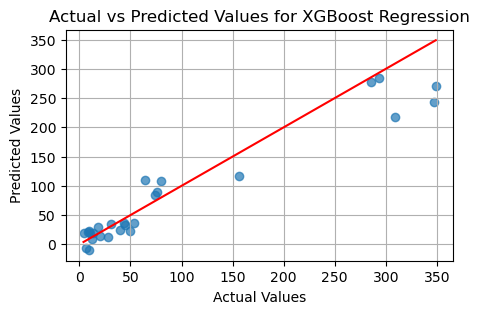

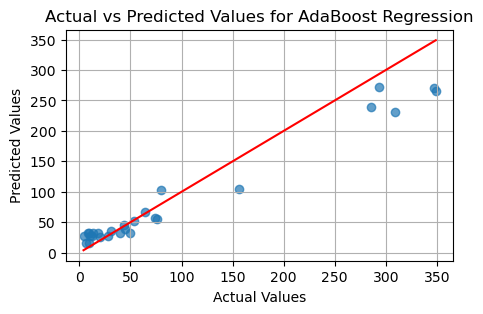

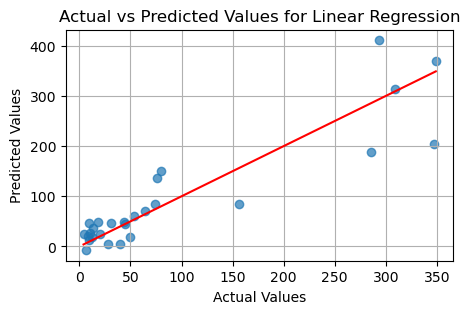

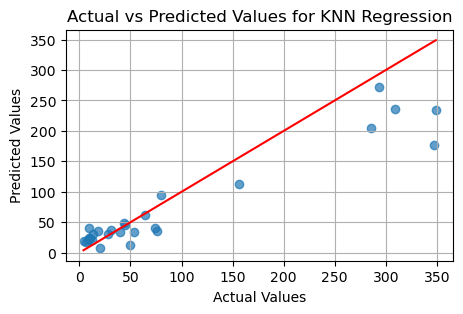

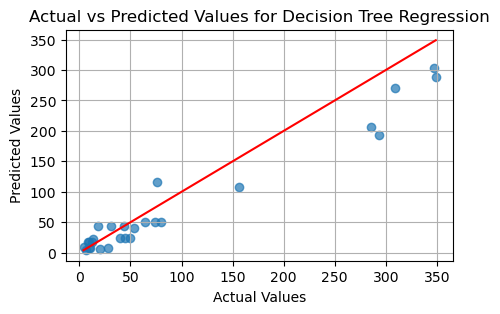

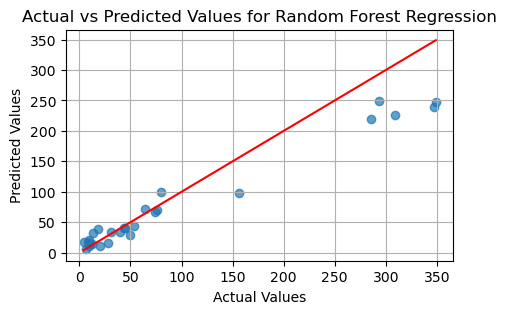

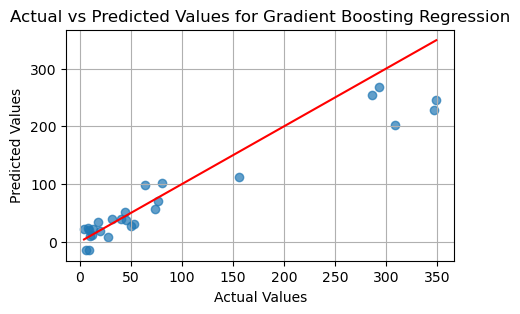

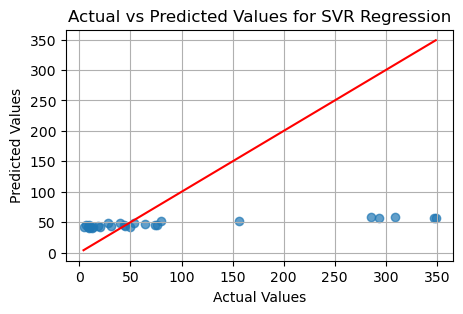

C:\Users\chibu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


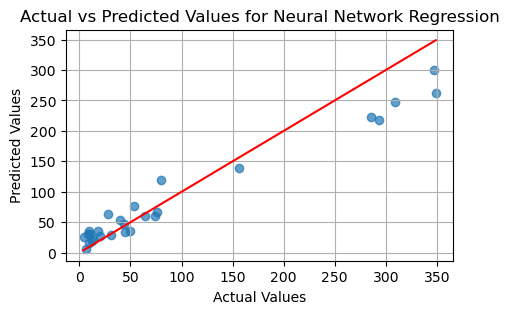

                          Model          MSE       RMSE        R2       MAE  \
0            XGBoost Regression   1233.77781   35.12517   0.90373  23.59736   
1           AdaBoost Regression   1065.38028   32.64016   0.91687  22.92011   
2             Linear Regression   2425.75732   49.25198   0.81072  33.04412   
3                KNN Regression   2354.68889   48.52514   0.81627  30.54074   
4      Decision Tree Regression   1191.44444   34.51731   0.90703  24.77778   
5      Random Forest Regression   1527.66552   39.08536   0.88080  24.23519   
6  Gradient Boosting Regression   1680.12210   40.98929   0.86890  26.43228   
7                SVR Regression  13499.91057  116.18912  -0.05337  69.53908   
8     Neural Network Regression   1105.56121   33.24998   0.91374  24.35561   

         R  
0  0.96748  
1  0.98721  
2  0.90368  
3  0.95721  
4  0.97887  
5  0.98700  
6  0.96754  
7  0.91513  
8  0.98519  


In [12]:
# Features after removing correlated features, using base model, evaluation on val
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from scipy.stats import pearsonr

# Ensure y_train and y_val are numpy arrays
y_train = y_train.values.ravel()
y_val = y_val.values.ravel()


# Define models
random_state = 42
models = [
    (XGBRegressor(random_state=random_state), 'XGBoost Regression'),
    (AdaBoostRegressor(random_state=random_state), 'AdaBoost Regression'),
    (LinearRegression(), 'Linear Regression'),
    (KNeighborsRegressor(), 'KNN Regression'),
    (DecisionTreeRegressor(random_state=random_state), 'Decision Tree Regression'),
    (RandomForestRegressor(random_state=random_state), 'Random Forest Regression'),
    (GradientBoostingRegressor(random_state=random_state), 'Gradient Boosting Regression'),
    (SVR(), 'SVR Regression'),
    (MLPRegressor(random_state=random_state, max_iter=1000), 'Neural Network Regression')
]

# DataFrame to store evaluation metrics
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'RMSE', 'R2', 'MAE','R'])

# Train, predict and evaluate models
metrics_list = []

for model, name in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r, _ = pearsonr(y_val, y_pred)
    
    metrics_list.append({
        'Model': name, 
        'MSE': f'{mse:.5f}', 
        'RMSE': f'{rmse:.5f}', 
        'R2': f'{r2:.5f}', 
        'MAE': f'{mae:.5f}',
        'R': f'{r:.5f}'
    })
    
    # Plot actual vs predicted values
    plt.figure(figsize=(5, 3))
    plt.scatter(y_val, y_pred, alpha=0.7)
    plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red')  # Diagonal line
    plt.title(f'Actual vs Predicted Values for {name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()
    

# Convert list of dictionaries to DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display evaluation metrics
print(metrics_df)

Training XGBoost Regression...
Best parameters for XGBoost Regression: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}


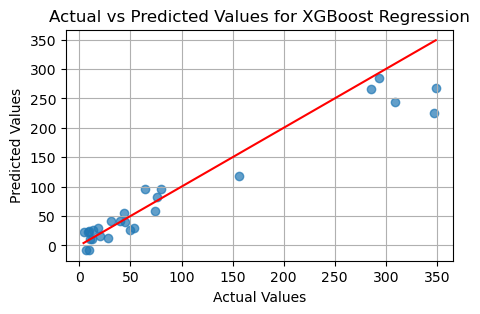

Training AdaBoost Regression...
Best parameters for AdaBoost Regression: {'learning_rate': 0.1, 'n_estimators': 200}


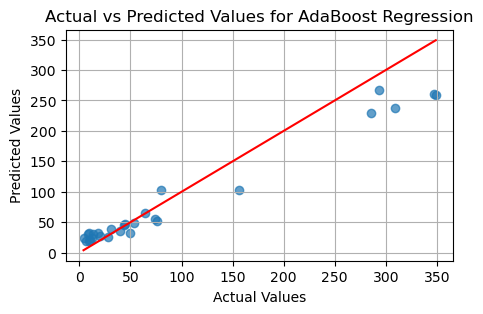

Training KNN Regression...
Best parameters for KNN Regression: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}


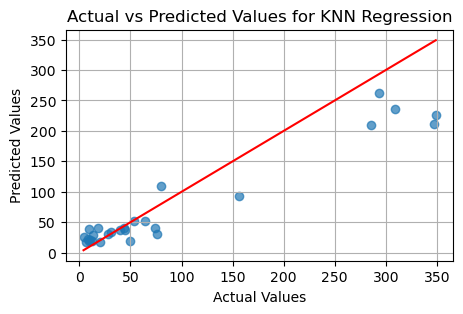

Training Decision Tree Regression...
Best parameters for Decision Tree Regression: {'max_depth': None, 'min_samples_split': 20}


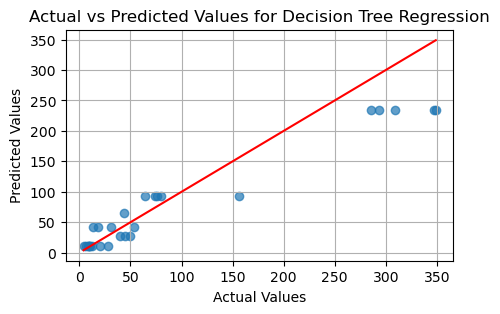

Training Random Forest Regression...
Best parameters for Random Forest Regression: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}


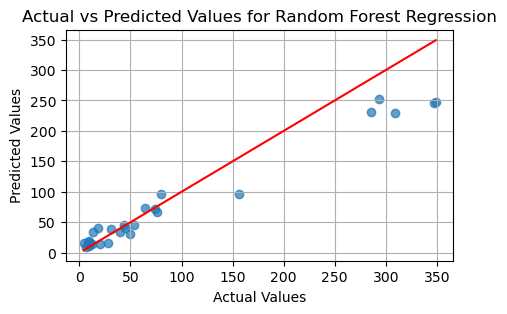

Training Gradient Boosting Regression...
Best parameters for Gradient Boosting Regression: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


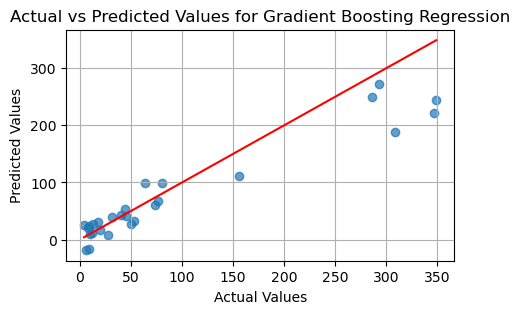

Training SVR Regression...
Best parameters for SVR Regression: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


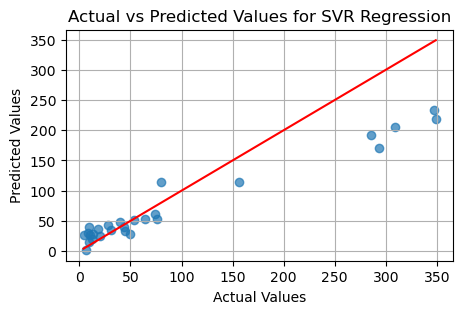

Training Neural Network Regression...


C:\Users\chibu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters for Neural Network Regression: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'solver': 'adam'}


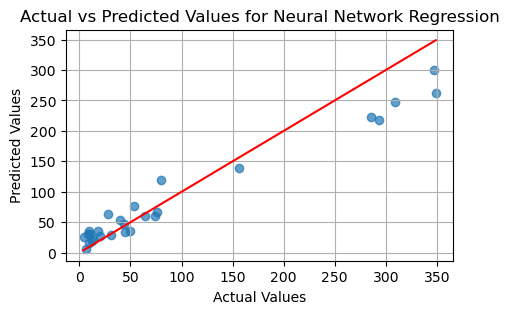

                          Model          MSE        MAE        R2       RMSE
0            XGBoost Regression  1203.895865  22.453266  0.906062  34.697203
1           AdaBoost Regression  1172.726208  23.727792  0.908494  34.245090
2                KNN Regression  2115.254574  30.236133  0.834951  45.991897
3      Decision Tree Regression  1724.756839  27.577773  0.865421  41.530192
4      Random Forest Regression  1392.167494  23.178849  0.891372  37.311761
5  Gradient Boosting Regression  1872.611397  27.678325  0.853884  43.273680
6                SVR Regression  2664.279700  33.406915  0.792111  51.616661
7     Neural Network Regression  1105.561206  24.355614  0.913735  33.249981


In [13]:
# Tuning the val data better with parameters
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Define models and parameters for GridSearchCV
random_state = 42

models = [
    (XGBRegressor(random_state=random_state), 'XGBoost Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    (AdaBoostRegressor(random_state=random_state), 'AdaBoost Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    }),
    (KNeighborsRegressor(), 'KNN Regression', {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree']
    }),
    (DecisionTreeRegressor(random_state=random_state), 'Decision Tree Regression', {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20]
    }),
    (RandomForestRegressor(random_state=random_state), 'Random Forest Regression', {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20]
    }),
    (GradientBoostingRegressor(random_state=random_state), 'Gradient Boosting Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    (SVR(), 'SVR Regression', {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf'],
        'gamma': ['scale', 'auto']
    }),
    (MLPRegressor(random_state=random_state, max_iter=1000), 'Neural Network Regression', {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['tanh', 'relu'],
        'solver': ['adam', 'lbfgs']
    })
]

# DataFrame to store evaluation metrics
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2', 'RMSE'])

# Train, predict and evaluate models
metrics_list = []

for model, name, params in models:
    print(f"Training {name}...")
    kf = KFold(n_splits=5, shuffle=True, random_state=random_state)
    grid_search = GridSearchCV(model, param_grid=params, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"Best parameters for {name}: {best_params}")
    
    y_pred = best_model.predict(X_val)
    
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    rmse = np.sqrt(mse)
    
    metrics_list.append({'Model': name, 'MSE': mse, 'MAE': mae, 'R2': r2, 'RMSE': rmse})
    
    # Plot actual vs predicted values
    plt.figure(figsize=(5, 3))
    plt.scatter(y_val, y_pred, alpha=0.7)
    plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red')  # Diagonal line
    plt.title(f'Actual vs Predicted Values for {name}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

# Convert list of dictionaries to DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display evaluation metrics
print(metrics_df)

                          Model       RMSE          MSE        MAE        R2  \
0            XGBoost Regression  43.479672  1890.481910  29.587535  0.845787   
1           AdaBoost Regression  41.703625  1739.192380  30.450451  0.858128   
2                KNN Regression  58.595402  3433.421175  39.248516  0.719923   
3      Decision Tree Regression  45.760490  2094.022472  30.620298  0.829183   
4      Random Forest Regression  40.653536  1652.709989  27.218444  0.865182   
5  Gradient Boosting Regression  41.885147  1754.365573  28.266485  0.856890   
6                SVR Regression  51.010821  2602.103813  29.811888  0.787737   
7     Neural Network Regression  47.315221  2238.730167  29.982002  0.817379   

          R  
0  0.920557  
1  0.926593  
2  0.888898  
3  0.915545  
4  0.930883  
5  0.925751  
6  0.933852  
7  0.936067  


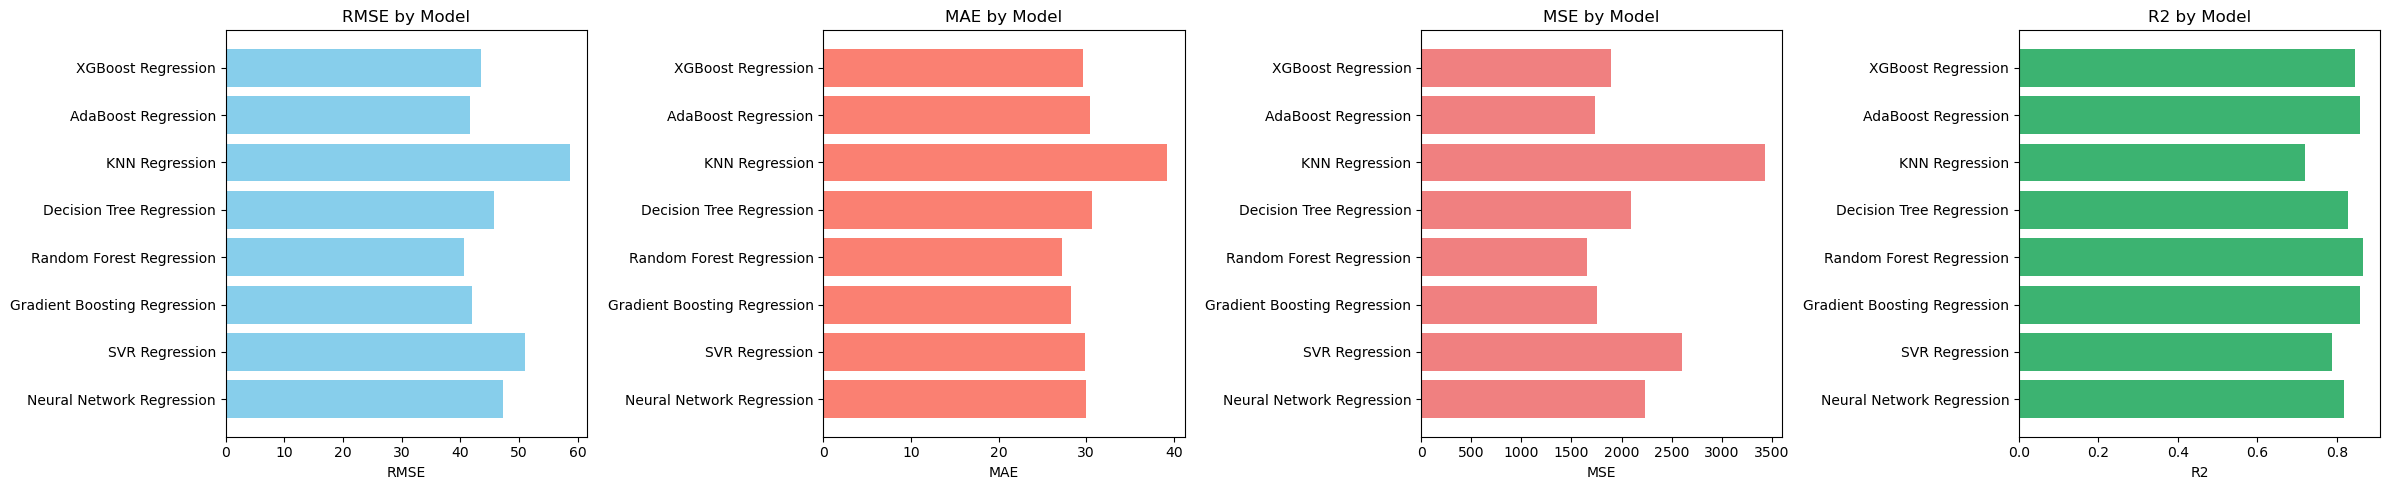

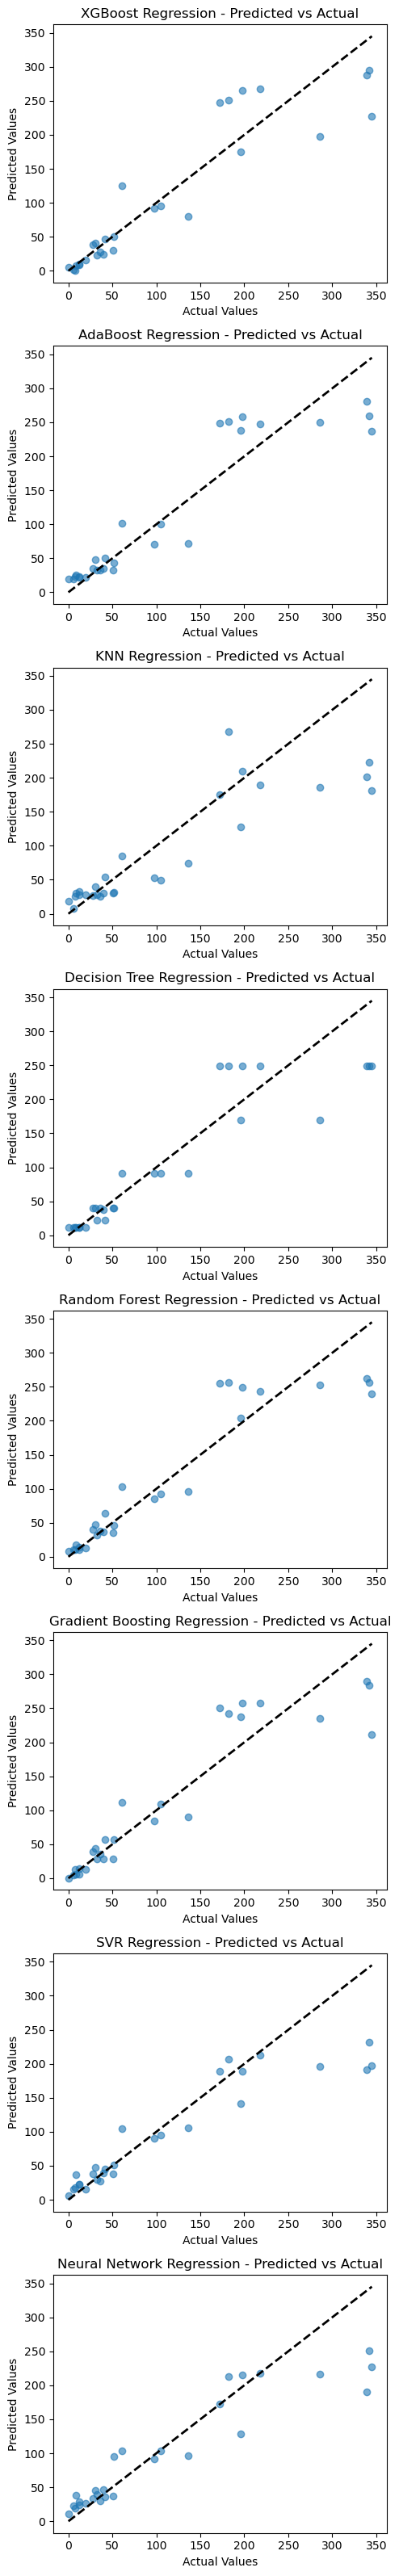

In [14]:
#using the best parameters on  features after correlation added on the test set
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.exceptions import ConvergenceWarning
import warnings
from scipy.stats import pearsonr

# Ignore convergence warnings for this example
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

# Assuming X_train_val, y_train_val, X_test, and y_test are provided
# Replace these with your actual data
# X_train_val = pd.DataFrame({...})
# y_train_val = pd.Series([...])
# X_test = pd.DataFrame({...})
# y_test = pd.Series([...])


# Define models with the best parameters found

            
best_params = {
    'XGBoost Regression': {'n_estimators': 200, 'learning_rate': 0.2, 'max_depth': 3},
    'AdaBoost Regression': {'n_estimators': 200, 'learning_rate': 0.1},
    'KNN Regression': {'n_neighbors': 7, 'weights': 'distance', 'algorithm': 'auto'},
    'Decision Tree Regression': {'max_depth': None, 'min_samples_split': 20},
    'Random Forest Regression': {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 10},
    'Gradient Boosting Regression': {'n_estimators': 200, 'learning_rate': 0.2, 'max_depth': 3},
    'SVR Regression': {'C': 10, 'kernel': 'linear', 'gamma': 'scale'},
    'Neural Network Regression': {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'adam'},
}
models = {
    'XGBoost Regression': XGBRegressor(random_state=random_state, **best_params['XGBoost Regression']),
    'AdaBoost Regression': AdaBoostRegressor(random_state=random_state, **best_params['AdaBoost Regression']),
    'KNN Regression': KNeighborsRegressor(**best_params['KNN Regression']),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=random_state, **best_params['Decision Tree Regression']),
    'Random Forest Regression': RandomForestRegressor(random_state=random_state, **best_params['Random Forest Regression']),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=random_state, **best_params['Gradient Boosting Regression']),
    'SVR Regression': SVR(**best_params['SVR Regression']),
    'Neural Network Regression': MLPRegressor(random_state=random_state, max_iter=1000, **best_params['Neural Network Regression'])
}

# Function to evaluate model on test data
def evaluate_on_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    y_test = np.ravel(y_test)
    predictions = np.ravel(predictions)
        
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse) 
    r2 = r2_score(y_test, predictions)
    r, _ = pearsonr(y_test, predictions)

    return predictions, rmse, mae, mse, r2,r

# Evaluate each model
test_results = []
predictions_dict = {}

for name, model in models.items():
    predictions, rmse, mae, mse, r2,r = evaluate_on_test(model, X_train_val, y_train_val, X_test, y_test)
    test_results.append({
        'Model': name,
        'RMSE': rmse,
        'MAE': mae,
        'MSE': mse,
        'R2': r2,
        'R':r
    })
    predictions_dict[name] = predictions

# Convert test results to DataFrame
test_results_df = pd.DataFrame(test_results)

# Print the test results
print(test_results_df[['Model', 'RMSE', 'MSE', 'MAE', 'R2','R']])

# Visualization of the performance metrics
def plot_metrics(df):
    fig, axes = plt.subplots(1, 4, figsize=(24, 5))

    # RMSE
    axes[0].barh(df['Model'], df['RMSE'], color='skyblue')
    axes[0].set_title('RMSE by Model')
    axes[0].set_xlabel('RMSE')
    axes[0].invert_yaxis()

    # MAE
    axes[1].barh(df['Model'], df['MAE'], color='salmon')
    axes[1].set_title('MAE by Model')
    axes[1].set_xlabel('MAE')
    axes[1].invert_yaxis()

    # MSE
    axes[2].barh(df['Model'], df['MSE'], color='lightcoral')
    axes[2].set_title('MSE by Model')
    axes[2].set_xlabel('MSE')
    axes[2].invert_yaxis()

    # R2
    axes[3].barh(df['Model'], df['R2'], color='mediumseagreen')
    axes[3].set_title('R2 by Model')
    axes[3].set_xlabel('R2')
    axes[3].invert_yaxis()

    plt.tight_layout()
    plt.show()

# Plot the metrics
plot_metrics(test_results_df)

# Visualization of predicted vs actual values
def plot_predictions(predictions_dict, y_test):
    fig, axes = plt.subplots(len(predictions_dict), 1, figsize=(5, len(predictions_dict) * 4))

    for i, (name, predictions) in enumerate(predictions_dict.items()):
        axes[i].scatter(y_test, predictions, alpha=0.6)
        axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        axes[i].set_title(f'{name} - Predicted vs Actual')
        axes[i].set_xlabel('Actual Values')
        axes[i].set_ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

# Plot the predictions
plot_predictions(predictions_dict, y_test)

                   Feature  Importance
0           matches_played    0.897612
24       degree_centrality    0.020333
25  betweenness_centrality    0.017412
12                   fouls    0.015028
1                aerials_l    0.012339
26         flow_centrality    0.010159
11           dribbled_past    0.007808
5              countattack    0.004879
4               clearances    0.002703
15               grduels_w    0.002422
13            goals_ag_otb    0.002391
9             drib_success    0.001648
6              crosses_acc    0.001573
22            tballs_inacc    0.000879
21              tballs_acc    0.000542
20                 tackles    0.000517
27       betweenness2goals    0.000510
23               wasfouled    0.000466
17                owngoals    0.000391
14               grduels_l    0.000197
28           game_duration    0.000080
8             dangmistakes    0.000064
10          drib_unsuccess    0.000045
19              stop_shots    0.000002
18            shotsblocke

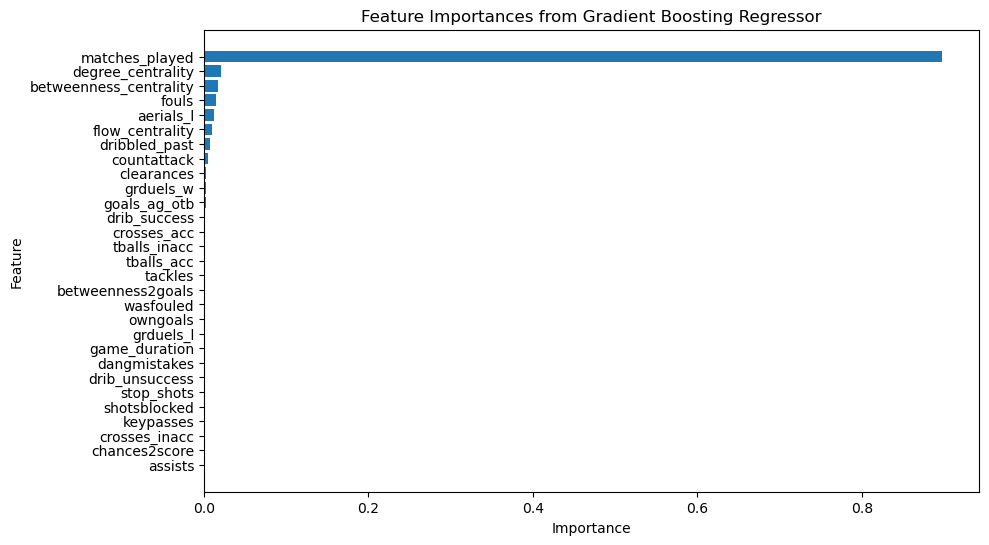

In [15]:
#using gradient boosting to find feature importance in the models 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

# Sample Data (Replace with your actual data)
# X_train_val_df = pd.DataFrame({...})
# y_train_val_df = pd.Series([...])

# Parameters from the tuning
random_state = 42
learning_rate = 0.2
n_estimators = 100
max_depth = 3

# Train GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(random_state=random_state, max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate)
gb_regressor.fit(X_train, y_train)

# Extract feature importances
importances = gb_regressor.feature_importances_
features = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(feature_importance_df)

# Visualization
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Gradient Boosting Regressor')
plt.gca().invert_yaxis()
plt.show()

In [16]:
#using subsets of features and performing parameter tunning it
import pandas as pd
import numpy as np
import random
import time
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
import warnings

# Ignore convergence warnings for this example
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

# Assuming X_train_val, y_train_val, X_val, and y_val are provided
# Replace these with your actual data
# X_train_val = pd.DataFrame({...})
# y_train_val = pd.Series([...])
# X_val = pd.DataFrame({...})
# y_val = pd.Series([...])

# Calculate feature importances using RandomForestRegressor on training and validation data
gb_regressor = GradientBoostingRegressor(random_state=random_state, max_depth=3, n_estimators=100, learning_rate=0.2)
gb_regressor.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(gb_regressor.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Define subsets of features
feature_subsets = {
    'top_5': feature_importances.index[:5],
    'top_10': feature_importances.index[:10],
    'top_20': feature_importances.index[:20],
    'top_30': feature_importances.index[:30]
}

# Define models with parameter grids for hyperparameter tuning

models = [
    (XGBRegressor(random_state=random_state), 'XGBoost Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    (AdaBoostRegressor(random_state=random_state), 'AdaBoost Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    }),
    (KNeighborsRegressor(), 'KNN Regression', {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree']
    }),
    (DecisionTreeRegressor(random_state=random_state), 'Decision Tree Regression', {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20]
    }),
    (RandomForestRegressor(random_state=random_state), 'Random Forest Regression', {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20]
    }),
    (GradientBoostingRegressor(random_state=random_state), 'Gradient Boosting Regression', {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    (SVR(), 'SVR Regression', {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf'],
        'gamma': ['scale', 'auto']
    }),
    (MLPRegressor(random_state=random_state, max_iter=1000), 'Neural Network Regression', {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['tanh', 'relu'],
        'solver': ['adam', 'lbfgs']
    })
]

# Function to evaluate model with grid search
def evaluate_model(model, params, X_train, y_train, X_val, y_val):
    try:
        start_time = time.time()
        grid_search = GridSearchCV(model, params, cv=3, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        end_time = time.time()
        
        best_model = grid_search.best_estimator_
        
        predictions = best_model.predict(X_val)
        
        mse = mean_squared_error(y_val, predictions)
        mae = mean_absolute_error(y_val, predictions)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_val, predictions)
        
        training_time = end_time - start_time
        
        return mse, mae, rmse, r2, predictions, best_model, grid_search.best_params_, training_time
    except Exception as e:
        print(f"Error evaluating model {model}: {e}")
        return None, None, None, None, None, None, None, None

results = []

for subset_name, features in feature_subsets.items():
    X_train_subset = X_train[features]
    X_val_subset = X_val[features]
    for model, name, params in models:
        mse, mae, rmse, r2, predictions, best_model, best_params, training_time = evaluate_model(model, params, X_train_subset, y_train, X_val_subset, y_val)
        if best_model is not None:
            results.append({
                'Subset': subset_name,
                'Model': name,
                'MSE': f'{mse:.5f}',
                'MAE': f'{mae:.5f}',
                'RMSE': f'{rmse:.5f}',
                'R2 Score': f'{r2:.5f}',
                'Best Params': best_params,
                'Training Time (s)': f'{training_time:.5f}'
            })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Set display options to show the full content of the Best Params column
pd.set_option('display.max_colwidth', None)

# Print the results
print(results_df[['Subset', 'Model', 'MSE', 'MAE', 'RMSE', 'R2 Score', 'Best Params', 'Training Time (s)']])

    Subset                         Model         MSE       MAE      RMSE  \
0    top_5            XGBoost Regression  1320.54702  25.28991  36.33933   
1    top_5           AdaBoost Regression  1115.58641  21.79447  33.40040   
2    top_5                KNN Regression  2130.26290  31.71260  46.15477   
3    top_5      Decision Tree Regression  1236.03701  23.60051  35.15732   
4    top_5      Random Forest Regression  1448.60798  24.66597  38.06058   
5    top_5  Gradient Boosting Regression  1411.09845  26.05234  37.56459   
6    top_5                SVR Regression   975.11320  25.21572  31.22680   
7    top_5     Neural Network Regression  1603.64655  27.87871  40.04556   
8   top_10            XGBoost Regression  1046.97940  21.64888  32.35706   
9   top_10           AdaBoost Regression  1147.42652  22.88844  33.87368   
10  top_10                KNN Regression  2494.94518  33.03387  49.94943   
11  top_10      Decision Tree Regression  1723.95004  27.23466  41.52048   
12  top_10  

In [17]:
print(results_df[['Subset', 'Model', 'MSE',  'MAE', 'R2 Score', 'Best Params', 'Training Time (s)']])

    Subset                         Model         MSE       MAE R2 Score  \
0    top_5            XGBoost Regression  1320.54702  25.28991  0.89696   
1    top_5           AdaBoost Regression  1115.58641  21.79447  0.91295   
2    top_5                KNN Regression  2130.26290  31.71260  0.83378   
3    top_5      Decision Tree Regression  1236.03701  23.60051  0.90355   
4    top_5      Random Forest Regression  1448.60798  24.66597  0.88697   
5    top_5  Gradient Boosting Regression  1411.09845  26.05234  0.88989   
6    top_5                SVR Regression   975.11320  25.21572  0.92391   
7    top_5     Neural Network Regression  1603.64655  27.87871  0.87487   
8   top_10            XGBoost Regression  1046.97940  21.64888  0.91831   
9   top_10           AdaBoost Regression  1147.42652  22.88844  0.91047   
10  top_10                KNN Regression  2494.94518  33.03387  0.80532   
11  top_10      Decision Tree Regression  1723.95004  27.23466  0.86548   
12  top_10      Random Fo

In [18]:
#visualising the best subsets to use
import pandas as pd

# Assuming results_df is already defined and contains your results
# Convert only the metric columns to numeric values for averaging
metric_columns = ['MSE', 'MAE','RMSE','R2 Score', 'Training Time (s)']
for col in metric_columns:
    results_df[col] = pd.to_numeric(results_df[col], errors='coerce')

# Group by subset and calculate the mean of each metric
subset_averages = results_df.groupby('Subset')[metric_columns].mean().reset_index()

# Display the averaged results
print(subset_averages)

   Subset          MSE        MAE       RMSE  R2 Score  Training Time (s)
0  top_10  1600.901192  25.968408  39.646273  0.875084          11.122794
1  top_20  1525.748327  25.584067  38.873764  0.880949          13.201518
2  top_30  1841.511522  27.279457  42.448370  0.856309          12.813140
3   top_5  1405.112440  25.776279  37.243669  0.890360          10.696301


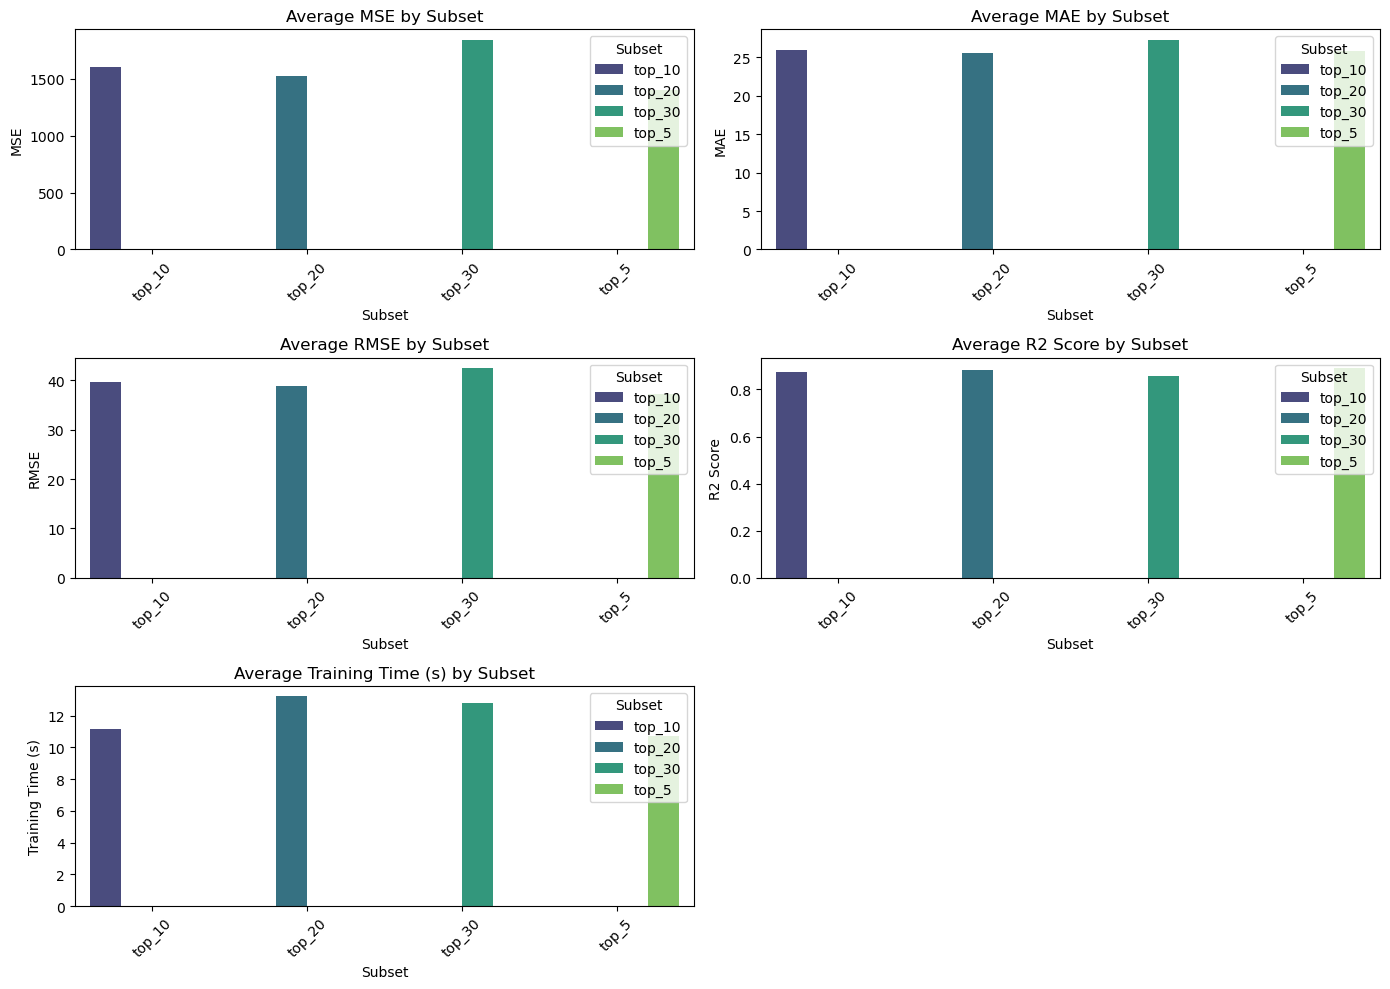

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(14, 10))

# Plotting the averages for each metric
metrics = ['MSE', 'MAE','RMSE','R2 Score', 'Training Time (s)']

for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 2, i)
    sns.barplot(data=subset_averages, x='Subset', y=metric, hue='Subset', palette='viridis')
    plt.title(f'Average {metric} by Subset')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

                          Model          MSE        MAE       RMSE        R2  \
0            XGBoost Regression  1392.070892  26.533911  37.310466  0.886444   
1           AdaBoost Regression  1608.858945  28.645963  40.110584  0.868760   
2                KNN Regression  2270.933422  36.163640  47.654312  0.814752   
3      Decision Tree Regression  1860.446305  31.434524  43.132891  0.848237   
4      Random Forest Regression  1641.064835  28.524130  40.510058  0.866132   
5  Gradient Boosting Regression  1232.281976  24.493118  35.103874  0.899478   
6                SVR Regression  2164.531615  34.461579  46.524527  0.823431   
7     Neural Network Regression  2340.400237  33.505012  48.377683  0.809085   

          R  
0  0.945006  
1  0.933064  
2  0.903976  
3  0.921156  
4  0.931113  
5  0.948438  
6  0.907626  
7  0.900684  


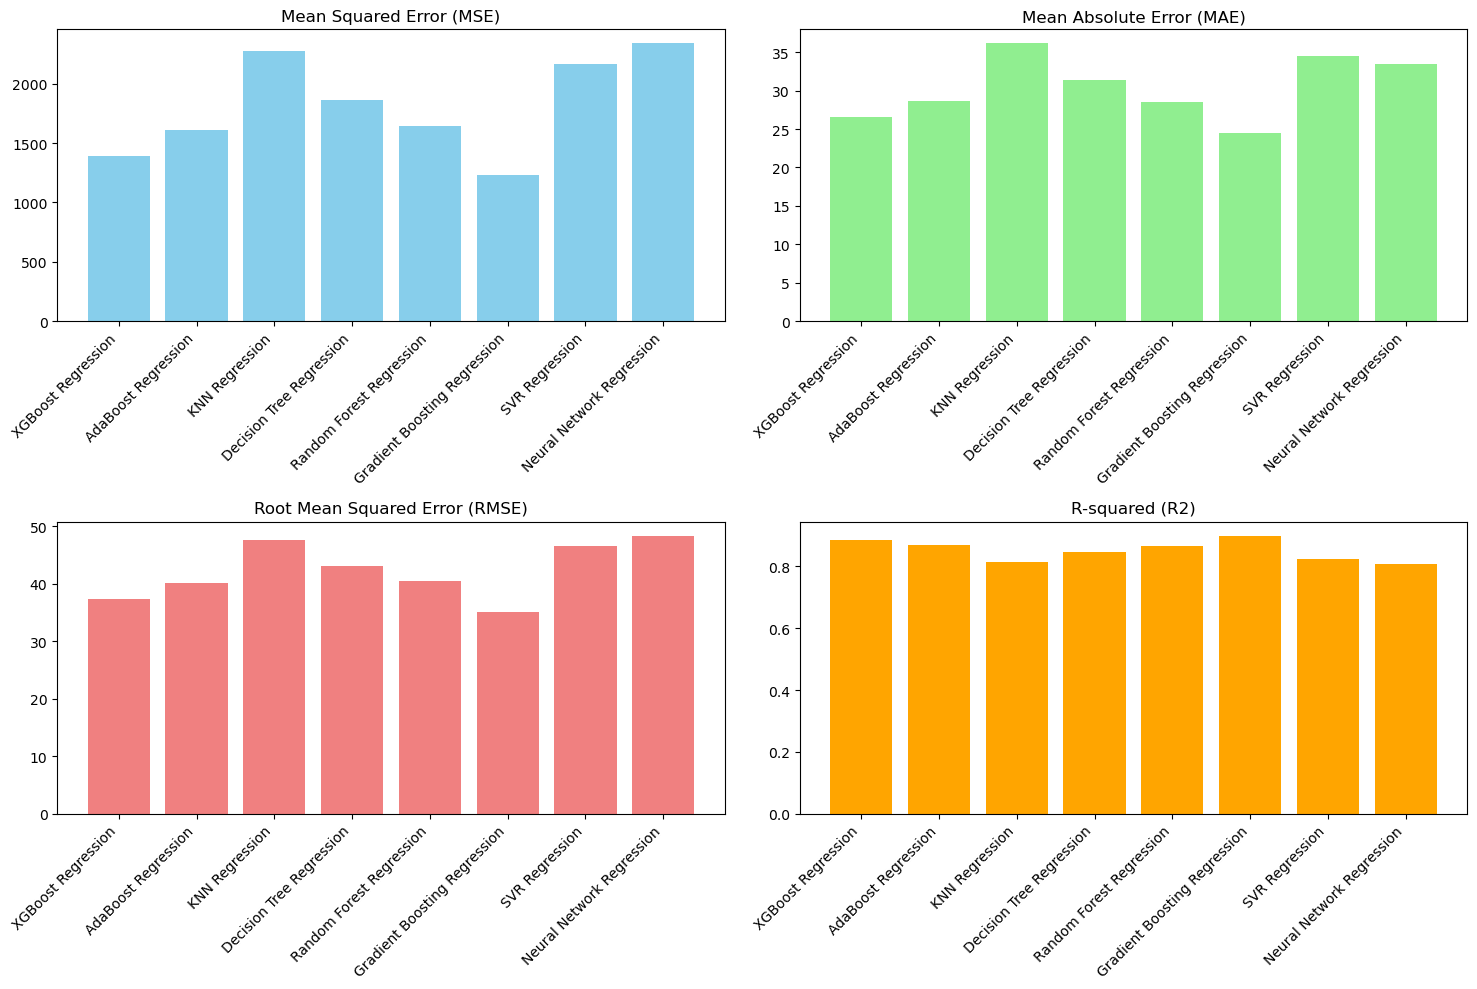

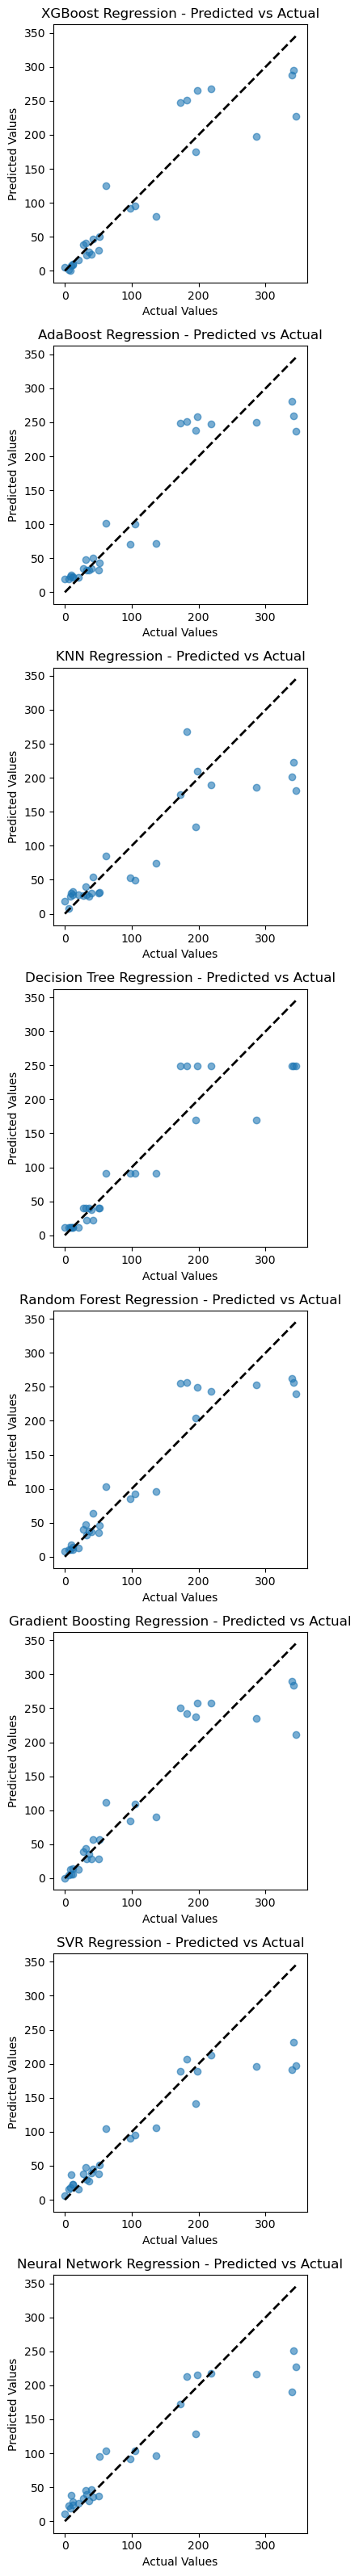

In [20]:
#using top 5 features with the X_train_val dataset and test sets, with the best parameters earlier
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.exceptions import ConvergenceWarning
import warnings
from scipy.stats import pearsonr


# Ignore convergence warnings for this example
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

# Assuming X_train_val, y_train_val, X_test, and y_test are provided
# Replace these with your actual data
# X_train_val = pd.DataFrame({...})
# y_train_val = pd.Series([...])
# X_test = pd.DataFrame({...})
# y_test = pd.Series([...])

# Select the subset of 20 features
selected_features = feature_importances.index[:5]
X_train_val_subset = X_train_val[selected_features]
X_test_subset = X_test[selected_features]

# Define models with the best parameters found

best_params = {
    'XGBoost Regression': {'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 3},
    'AdaBoost Regression': {'n_estimators': 200, 'learning_rate': 0.2},
    'KNN Regression': {'n_neighbors': 7, 'weights': 'distance', 'algorithm': 'auto'},
    'Decision Tree Regression': {'max_depth': None, 'min_samples_split': 10},
    'Random Forest Regression': {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 2},
    'Gradient Boosting Regression': {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 3},
    'SVR Regression': {'C': 10, 'kernel': 'poly', 'gamma': 'scale'},
    'Neural Network Regression': {'hidden_layer_sizes': (50,50,), 'activation': 'relu', 'solver': 'adam'},
    'Linear Regression': {'copy_X':True, 'fit_intercept':True, 'n_jobs':-1}
}

models = {
    'XGBoost Regression': XGBRegressor(random_state=random_state, **best_params['XGBoost Regression']),
    'AdaBoost Regression': AdaBoostRegressor(random_state=random_state, **best_params['AdaBoost Regression']),
    'KNN Regression': KNeighborsRegressor(**best_params['KNN Regression']),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=random_state, **best_params['Decision Tree Regression']),
    'Random Forest Regression': RandomForestRegressor(random_state=random_state, **best_params['Random Forest Regression']),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=random_state, **best_params['Gradient Boosting Regression']),
    'SVR Regression': SVR(**best_params['SVR Regression']),
    'Neural Network Regression': MLPRegressor(random_state=random_state, max_iter=1000, **best_params['Neural Network Regression'])
}

# Function to evaluate model on test data
def evaluate_on_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    y_test = np.ravel(y_test)
    predictions = np.ravel(predictions)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    r, _ = pearsonr(y_test, predictions)

    return rmse, mae, mse, r2,r

# Evaluate each model
test_results = []

for name, model in models.items():
    rmse, mae, mse, r2,r = evaluate_on_test(model, X_train_val_subset, y_train_val, X_test_subset, y_test)
    test_results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'R':r
    })

# Convert test results to DataFrame
test_results_df = pd.DataFrame(test_results)

# Print the test results
print(test_results_df[['Model', 'MSE', 'MAE', 'RMSE', 'R2','R']])

# Visualization of metrics for each model
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot MSE
axs[0, 0].bar(test_results_df['Model'], test_results_df['MSE'], color='skyblue')
axs[0, 0].set_title('Mean Squared Error (MSE)')
axs[0, 0].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot MAE
axs[0, 1].bar(test_results_df['Model'], test_results_df['MAE'], color='lightgreen')
axs[0, 1].set_title('Mean Absolute Error (MAE)')
axs[0, 1].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot RMSE
axs[1, 0].bar(test_results_df['Model'], test_results_df['RMSE'], color='lightcoral')
axs[1, 0].set_title('Root Mean Squared Error (RMSE)')
axs[1, 0].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot R2 Score
axs[1, 1].bar(test_results_df['Model'], test_results_df['R2'], color='orange')
axs[1, 1].set_title('R-squared (R2)')
axs[1, 1].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Visualization of predicted vs actual values
def plot_predictions(predictions_dict, y_test):
    fig, axes = plt.subplots(len(predictions_dict), 1, figsize=(4, len(predictions_dict) * 4))

    for i, (name, predictions) in enumerate(predictions_dict.items()):
        axes[i].scatter(y_test, predictions, alpha=0.6)
        axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        axes[i].set_title(f'{name} - Predicted vs Actual')
        axes[i].set_xlabel('Actual Values')
        axes[i].set_ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

# Plot the predictions
plot_predictions(predictions_dict, y_test)

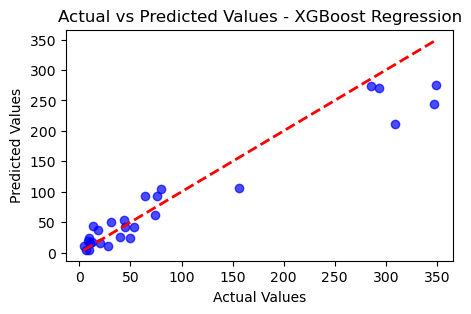

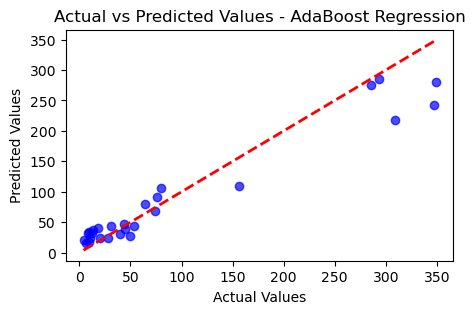

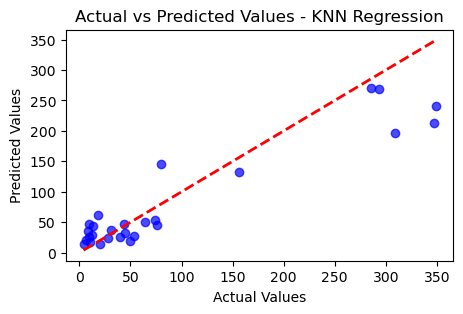

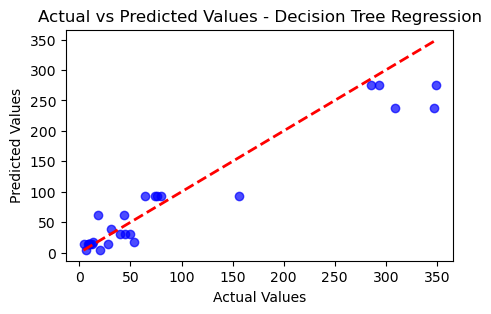

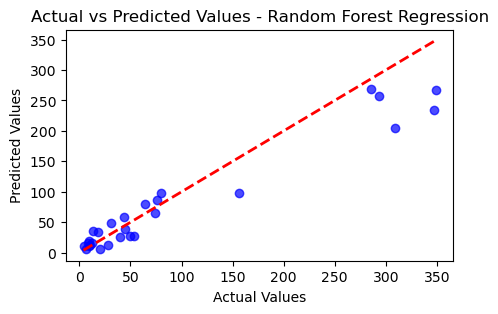

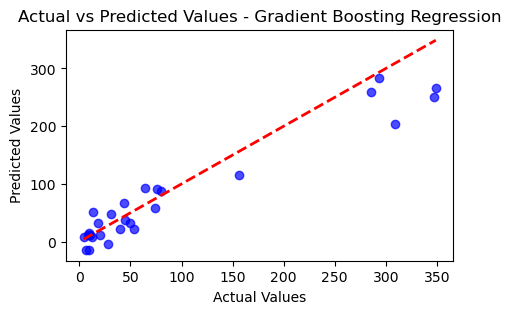

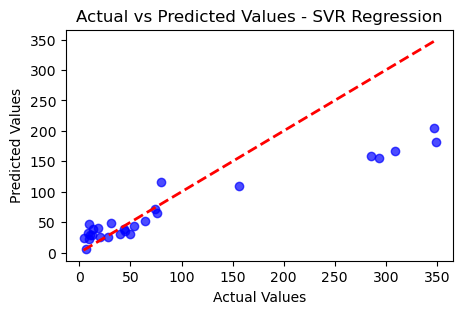

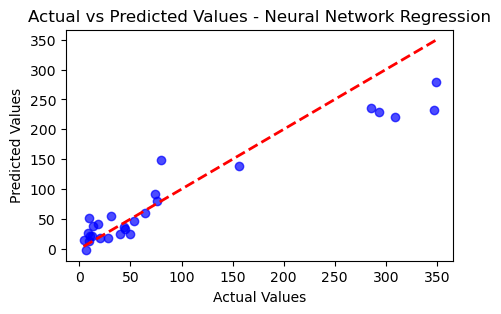

  Subset                         Model         MSE       MAE      RMSE  \
0  top_5            XGBoost Regression  1264.90987  23.93913  35.56557   
1  top_5           AdaBoost Regression  1191.02607  23.43114  34.51125   
2  top_5                KNN Regression  2130.26290  31.71260  46.15477   
3  top_5      Decision Tree Regression  1236.03701  23.60051  35.15732   
4  top_5      Random Forest Regression  1448.60798  24.66597  38.06058   
5  top_5  Gradient Boosting Regression  1397.60644  26.12263  37.38457   
6  top_5                SVR Regression  4147.29464  39.94783  64.39949   
7  top_5     Neural Network Regression  1599.91855  27.88041  39.99898   

        R2                                    Best Params Training Time (s)  
0  0.90130    {'colsample_bytree': 1.0, 'subsample': 0.8}           2.37968  
1  0.90707                             {'loss': 'square'}           2.55824  
2  0.83378                              {'leaf_size': 10}           0.07951  
3  0.90355           

In [23]:
#using more parameters to tune the top 5 features
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
import warnings

# Ignore convergence warnings for this example
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

# Assuming X_train_val, y_train_val, X_val, and y_val are provided
# Replace these with your actual data
# X_train_val = pd.DataFrame({...})
# y_train_val = pd.Series([...])
# X_val = pd.DataFrame({...})
# y_val = pd.Series([...])


# Define subset of features (top 20 only)
# Select the subset of 20 features
selected_features = feature_importances.index[:5]
X_train_subset = X_train[selected_features]
X_val_subset = X_val[selected_features]

    
# Define models with parameter grids for hyperparameter tuning

   

models = [
    (XGBRegressor(random_state=random_state,n_estimators=50,learning_rate=0.1,max_depth=3), 'XGBoost Regression', {
        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
    }),
    (AdaBoostRegressor(random_state=random_state,learning_rate=0.2,n_estimators=200), 'AdaBoost Regression', {
        'loss': ['linear', 'square', 'exponential']
    }),
    (KNeighborsRegressor(n_neighbors=7,weights='distance',algorithm='auto'), 'KNN Regression', {
        'leaf_size': [10, 20, 30, 40, 50]
    }),
    (DecisionTreeRegressor(random_state=random_state,max_depth=None,min_samples_split=10), 'Decision Tree Regression', {
        'min_samples_leaf': [1, 2, 4, 6, 8]
    }),
    (RandomForestRegressor(random_state=random_state,max_depth=10,min_samples_split=2,n_estimators=50), 'Random Forest Regression', {
        'bootstrap': [True, False]
    }),
    (GradientBoostingRegressor(random_state=random_state,learning_rate=0.1,max_depth=3,n_estimators=200), 'Gradient Boosting Regression', {
        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]
    }),
    (SVR(C=10,gamma='scale',kernel='linear'), 'SVR Regression', {
        'epsilon': [0.1, 0.2, 0.5, 0.3, 0.05]
    }),
    (MLPRegressor(random_state=random_state, max_iter=1000,hidden_layer_sizes= (50,50),activation='relu', solver='adam'), 'Neural Network Regression', {
        'alpha': [0.0001, 0.001, 0.01, 0.1],
        'learning_rate': ['constant', 'invscaling', 'adaptive']
    })
]

# Function to evaluate model with grid search
def evaluate_model(model, params, X_train, y_train, X_val, y_val):
    try:
        start_time = time.time()
        grid_search = GridSearchCV(model, params, cv=3, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        end_time = time.time()
        
        best_model = grid_search.best_estimator_
        
        predictions = best_model.predict(X_val)
        mse = mean_squared_error(y_val, predictions)
        rmse = np.sqrt(mse) 
        mae = mean_absolute_error(y_val, predictions)
        r2 = r2_score(y_val, predictions)
        
        training_time = end_time - start_time
        
        return mse, mae, rmse, r2, predictions, best_model, grid_search.best_params_, training_time
    except Exception as e:
        print(f"Error evaluating model {model}: {e}")
        return None, None, None, None, None, None, None, None

# Function to plot predicted vs actual values
def plot_predictions(y_val, predictions, model_name):
    plt.figure(figsize=(5, 3))
    plt.scatter(y_val, predictions, alpha=0.7, color='b')
    plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted Values - {model_name}')
    plt.show()

results = []

for model, name, params in models:
    mse, mae, rmse, r2, predictions, best_model, best_params, training_time = evaluate_model(model, params, X_train_subset, y_train, X_val_subset, y_val)
    if best_model is not None:
        results.append({
            'Subset': 'top_5',
            'Model': name,
            'MSE': f'{mse:.5f}',
            'MAE': f'{mae:.5f}',
            'RMSE': f'{rmse:.5f}',
            'R2': f'{r2:.5f}',
            'Best Params': best_params,
            'Training Time (s)': f'{training_time:.5f}'
        })
        # Plot predictions vs actual values
        plot_predictions(y_val, predictions, name)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Set display options to show the full content of the Best Params column
pd.set_option('display.max_colwidth', None)

# Print the results
print(results_df[['Subset', 'Model', 'MSE', 'MAE', 'RMSE', 'R2', 'Best Params', 'Training Time (s)']])

                          Model          MSE        MAE       RMSE        R2  \
0            XGBoost Regression  1551.386366  28.238287  39.387642  0.873448   
1           AdaBoost Regression  1645.139435  29.116555  40.560318  0.865800   
2                KNN Regression  2270.933422  36.163640  47.654312  0.814752   
3      Decision Tree Regression  1860.446305  31.434524  43.132891  0.848237   
4      Random Forest Regression  1641.064835  28.524130  40.510058  0.866132   
5  Gradient Boosting Regression  1166.426732  23.167333  34.152990  0.904850   
6                SVR Regression  2165.285137  34.461283  46.532624  0.823370   
7     Neural Network Regression  2341.857033  33.545355  48.392737  0.808966   

          R  
0  0.936634  
1  0.931048  
2  0.903976  
3  0.921156  
4  0.931113  
5  0.951994  
6  0.907585  
7  0.900606  


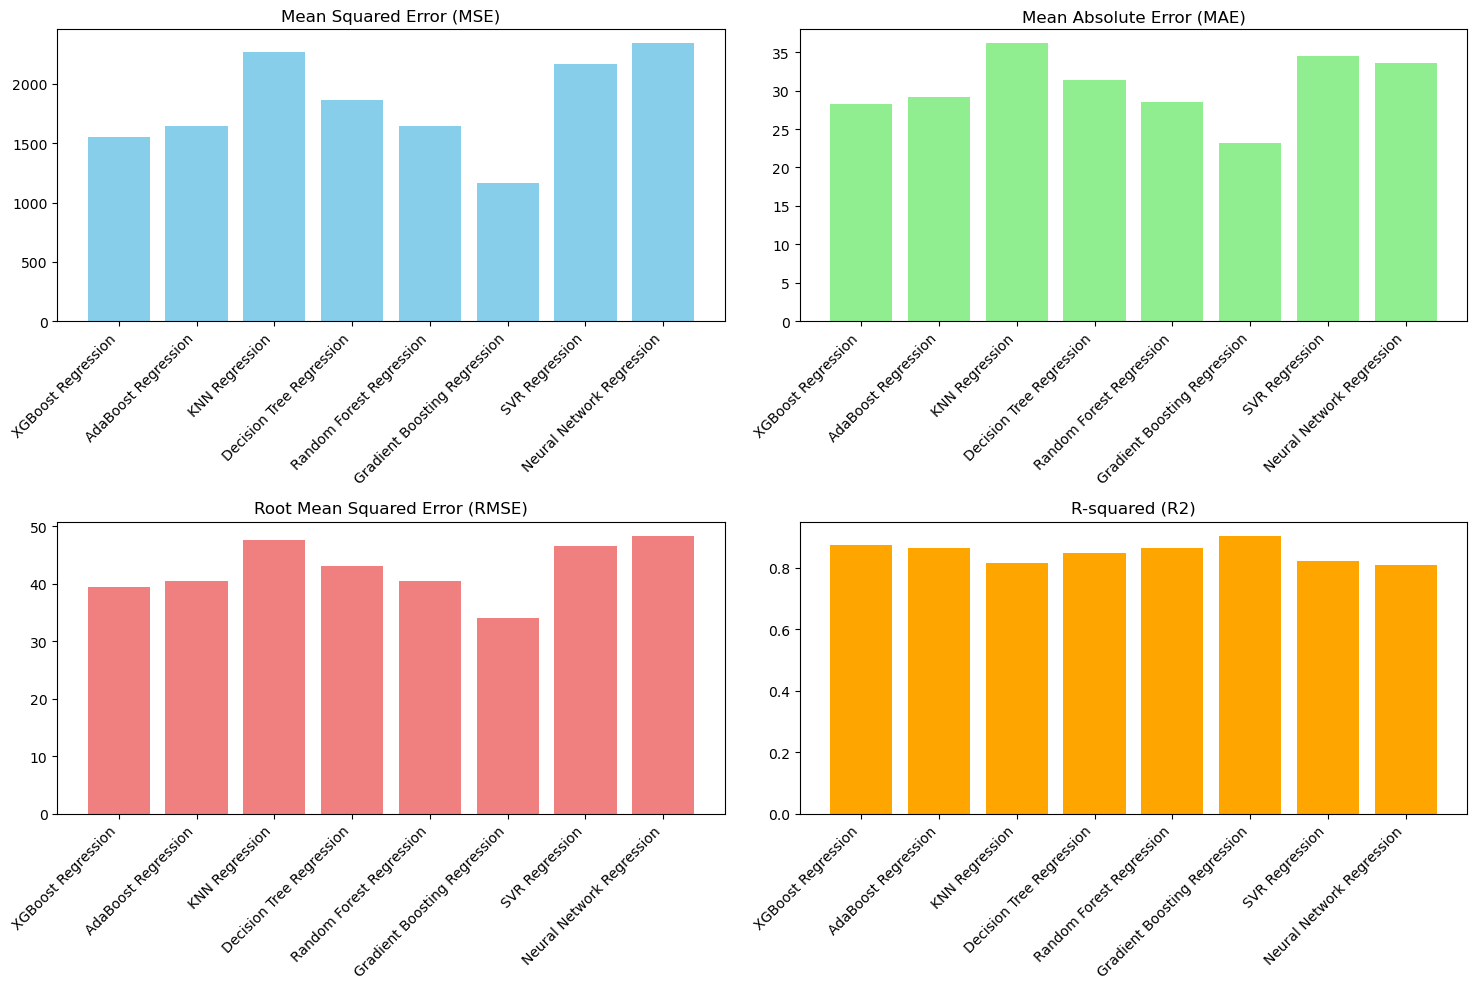

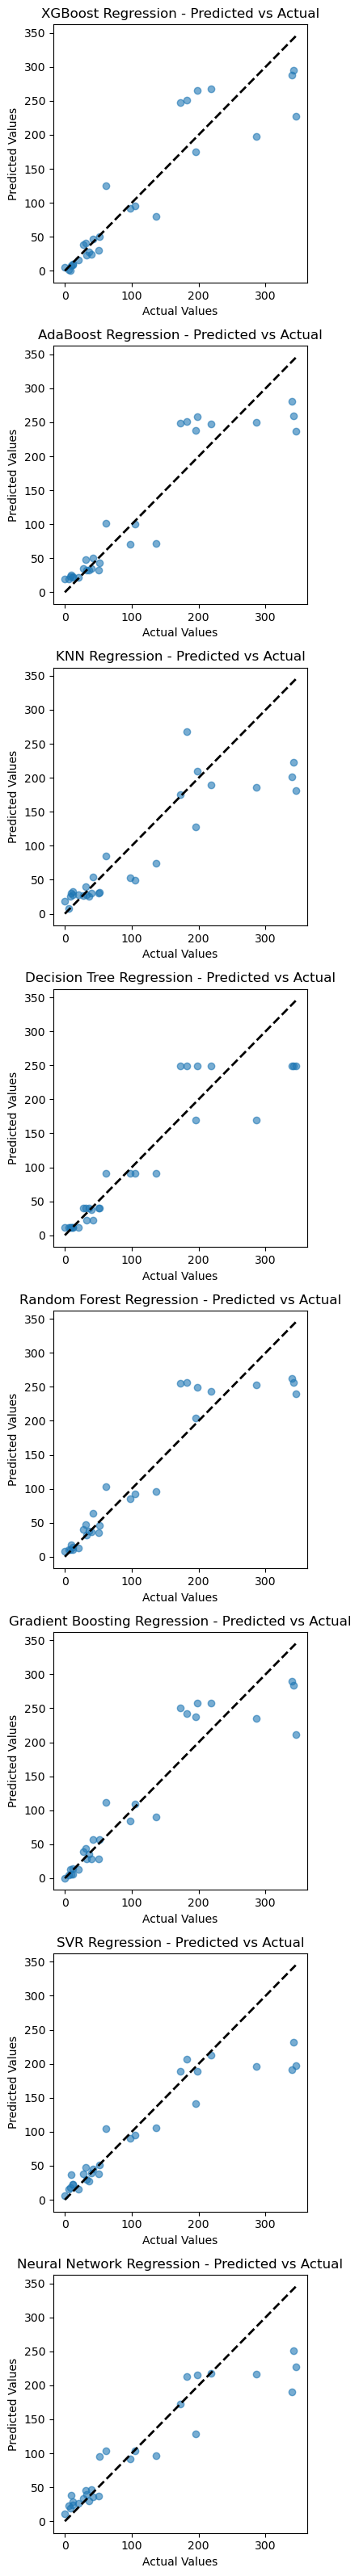

In [24]:
#using the MORE hyper-parameter tunning on the test set with 5 features
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.exceptions import ConvergenceWarning
import warnings

# Ignore convergence warnings for this example
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set random seeds for reproducibility
random_state = 42
np.random.seed(random_state)
random.seed(random_state)

# Assuming X_train_val, y_train_val, X_test, and y_test are provided
# Replace these with your actual data
# X_train_val = pd.DataFrame({...})
# y_train_val = pd.Series([...])
# X_test = pd.DataFrame({...})
# y_test = pd.Series([...])

# Select the subset of 20 features
selected_features = feature_importances.index[:5]
X_train_val_subset = X_train_val[selected_features]
X_test_subset = X_test[selected_features] 


# Define models with the best parameters found

best_params = {
    'XGBoost Regression': {'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 3,'colsample_bytree':1.0,'subsample':0.8},
    'AdaBoost Regression': {'n_estimators': 200, 'learning_rate': 0.2,'loss':'square'},
    'KNN Regression': {'n_neighbors': 7, 'weights': 'distance', 'algorithm': 'auto','leaf_size':10},
    'Decision Tree Regression': {'max_depth': None, 'min_samples_split': 10,'min_samples_leaf':1},
    'Random Forest Regression': {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 2,'bootstrap':True},
    'Gradient Boosting Regression': {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 3,'subsample':0.8},
    'SVR Regression': {'C': 10, 'kernel': 'poly', 'gamma': 'scale','epsilon':0.05},
    'Neural Network Regression': {'hidden_layer_sizes': (50,50), 'activation': 'relu', 'solver': 'adam','alpha':0.001,'learning_rate':'constant'}
}

models = {
    'XGBoost Regression': XGBRegressor(random_state=random_state, **best_params['XGBoost Regression']),
    'AdaBoost Regression': AdaBoostRegressor(random_state=random_state, **best_params['AdaBoost Regression']),
    'KNN Regression': KNeighborsRegressor(**best_params['KNN Regression']),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=random_state, **best_params['Decision Tree Regression']),
    'Random Forest Regression': RandomForestRegressor(random_state=random_state, **best_params['Random Forest Regression']),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=random_state, **best_params['Gradient Boosting Regression']),
    'SVR Regression': SVR(**best_params['SVR Regression']),
    'Neural Network Regression': MLPRegressor(random_state=random_state, max_iter=1000, **best_params['Neural Network Regression'])
}

# Function to evaluate model on test data
def evaluate_on_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    y_test = np.ravel(y_test)
    predictions = np.ravel(predictions)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    r, _ = pearsonr(y_test, predictions)

    return rmse, mae, mse, r2,r

# Evaluate each model
test_results = []

for name, model in models.items():
    rmse, mae, mse, r2,r = evaluate_on_test(model, X_train_val_subset, y_train_val, X_test_subset, y_test)
    test_results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'R':r
    })

# Convert test results to DataFrame
test_results_df = pd.DataFrame(test_results)

# Print the test results
print(test_results_df[['Model', 'MSE', 'MAE', 'RMSE', 'R2','R']])

# Visualization of metrics for each model
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot MSE
axs[0, 0].bar(test_results_df['Model'], test_results_df['MSE'], color='skyblue')
axs[0, 0].set_title('Mean Squared Error (MSE)')
axs[0, 0].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot MAE
axs[0, 1].bar(test_results_df['Model'], test_results_df['MAE'], color='lightgreen')
axs[0, 1].set_title('Mean Absolute Error (MAE)')
axs[0, 1].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot RMSE
axs[1, 0].bar(test_results_df['Model'], test_results_df['RMSE'], color='lightcoral')
axs[1, 0].set_title('Root Mean Squared Error (RMSE)')
axs[1, 0].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

# Plot R2 Score
axs[1, 1].bar(test_results_df['Model'], test_results_df['R2'], color='orange')
axs[1, 1].set_title('R-squared (R2)')
axs[1, 1].set_xticklabels(test_results_df['Model'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Visualization of predicted vs actual values
def plot_predictions(predictions_dict, y_test):
    fig, axes = plt.subplots(len(predictions_dict), 1, figsize=(4, len(predictions_dict) * 4))

    for i, (name, predictions) in enumerate(predictions_dict.items()):
        axes[i].scatter(y_test, predictions, alpha=0.6)
        axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
        axes[i].set_title(f'{name} - Predicted vs Actual')
        axes[i].set_xlabel('Actual Values')
        axes[i].set_ylabel('Predicted Values')

    plt.tight_layout()
    plt.show()

# Plot the predictions
plot_predictions(predictions_dict, y_test)

In [25]:
#its kind of try tunning the parameters till you get a very good score